# K-Means Clustering

<b>Steps</b>
1. Choose no of k of clusters
2. select at random k points, the centroids (not necessarily from your dataset)
3. Assign each data point to closet centroid - that forms k cluster using Euclidean distance
4. Compute and place the new centroid of each cluster
5. Ressign each data point to closest centroid.3

<b>Steps in Python</b>
1. Import the Libraries
2. Import the dataset
3. Using elbow method find the optimal number of clusters
4. Training K-Means on Clusters
5. Visualizing Clusters.

In [1]:
## Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

<b>In Cluster problem there is no dependent variable. So the last column "Spending Score (1-100)" is not a dependent variable rather its a feature to form cluster</b>

In [2]:
#Import Dataset
df = pd.read_csv(r'C:\Users\User\Desktop\Anindita Mitra\Dataset\Mall_Customers.csv')

In [14]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
#define X
x = df.iloc[:, [2, 4]].values

In [16]:
# Apply elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

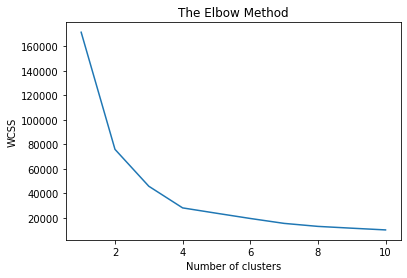

In [17]:
#optimal no of cluster is 5 because initially it was decressing rigorously but after 5 it is decressing slowly.
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
    

In [18]:
#Training K-Clustering
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
#creating a dependent varibale (kmeans.fit_predict with this method we can find the dependent variable)
y_pred_kmeans = kmeans.fit_predict(x)

In [19]:
#the below are the index number of the cluster 4 = cluster 5, 1 = cluster2, 0 = cluster1)
print(y_pred_kmeans)

[4 1 0 1 4 1 0 1 0 1 0 1 0 1 0 1 2 4 2 1 2 1 0 1 0 1 2 4 2 1 0 1 0 1 0 1 0
 1 2 1 3 1 2 4 2 4 3 4 4 4 3 4 4 3 2 2 3 3 4 3 3 4 3 3 3 4 2 3 4 4 3 2 3 3
 3 4 2 2 4 2 3 4 3 2 4 2 3 4 4 2 3 4 2 2 4 4 2 4 2 4 4 2 3 4 3 4 3 3 3 3 3
 4 2 4 4 4 3 3 2 3 4 2 4 1 4 1 2 1 0 1 0 1 4 1 0 1 0 1 0 1 0 1 4 1 0 1 2 1
 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 2 1 0 1 2 4 0 1 0 1 0 1 0 1 0 1 2 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1]


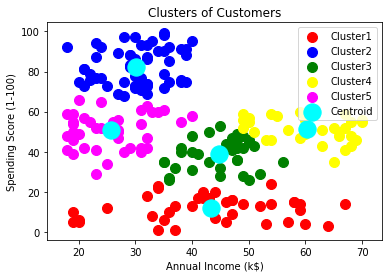

In [20]:
# Vizualizing the Clusters 1 with index 0
# this [y_pred_kmeans == ,0] will select all the cust whose y_pred_means belongs to cluster 1 with index 0
# 0 (x) : Annual Income (k$)
# y_pred_kmeans : Spending Score (1-100)

#Clusters 1 | Index 0
plt.scatter(x[y_pred_kmeans == 0,0], x[y_pred_kmeans == 0,1], s = 100, c = 'red', label = 'Cluster1')
#Clusters 2 | Index 1
plt.scatter(x[y_pred_kmeans == 1,0], x[y_pred_kmeans == 1,1], s = 100, c = 'blue', label = 'Cluster2')
#Clusters 3 | Index 2
plt.scatter(x[y_pred_kmeans == 2,0], x[y_pred_kmeans == 2,1], s = 100, c = 'green', label = 'Cluster3')
#Clusters 4 | Index 3
plt.scatter(x[y_pred_kmeans == 3,0], x[y_pred_kmeans == 3,1], s = 100, c = 'yellow', label = 'Cluster4')
#Clusters 5 | Index 4
plt.scatter(x[y_pred_kmeans == 4,0], x[y_pred_kmeans == 4,1], s = 100, c = 'magenta', label = 'Cluster5')

#Centroid # x                              #y
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s = 300, color='cyan', label='Centroid')

#Title
plt.title('Clusters of Customers')
# X-Label
plt.xlabel('Annual Income (k$)')
# y-Label
plt.ylabel('Spending Score (1-100)')

plt.legend()

#Complete Viz.
plt.show()

# Conclusion 

Cluster 1 : income range from low to high but expenditure is less

Cluster 2 : income is low but expenditure is high

Cluster 3 : income is moderate but expenditure is moderate

Cluster 4 : income is high but expenditure is moderate

Cluster 5 : income is low and expenditure is slightly high